# Build basic 2-Layer MLP to solve the xor-Problem

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.model_selection import train_test_split #for test set generation

In [201]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [202]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

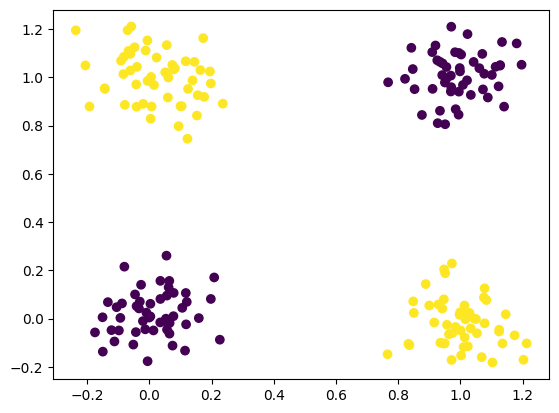

In [203]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [204]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size=2, hidden_size=8, output_size=1):
        super(MLP, self).__init__()
        # First layer (input to hidden)
        self.layer1 = nn.Linear(input_size, hidden_size)
        # Second layer (hidden to output)
        self.layer2 = nn.Linear(hidden_size, output_size)
        # Activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # First layer forward pass with activation
        x = self.sigmoid(self.layer1(x))
        # Second layer forward pass with activation
        output = self.sigmoid(self.layer2(x))
        return output

In [205]:

#split in train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [206]:
#have look
y_train

tensor([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1.])

In [207]:
#get instance of perceptron model
model = MLP(input_size=2, hidden_size=8, output_size=1)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
#run test data theogh untrained model
model.eval() #set to eval mode
model(x_test)

tensor([[0.4925],
        [0.4963],
        [0.4958],
        [0.4958],
        [0.4957],
        [0.4918],
        [0.4988],
        [0.4987],
        [0.4967],
        [0.4989],
        [0.4920],
        [0.4997],
        [0.4905],
        [0.4994],
        [0.4945],
        [0.4957],
        [0.4946],
        [0.4953],
        [0.4944],
        [0.4950],
        [0.4983],
        [0.4962],
        [0.4992],
        [0.4956],
        [0.4907],
        [0.4982],
        [0.4962],
        [0.4916],
        [0.4952],
        [0.4965],
        [0.4918],
        [0.4958],
        [0.4991],
        [0.4913],
        [0.4983],
        [0.4918],
        [0.4953],
        [0.4969],
        [0.4995],
        [0.4917],
        [0.4991],
        [0.4964],
        [0.4915],
        [0.4970],
        [0.4955],
        [0.4925],
        [0.4917],
        [0.4959],
        [0.4954],
        [0.4989],
        [0.4961],
        [0.4965],
        [0.4981],
        [0.4991],
        [0.4992],
        [0

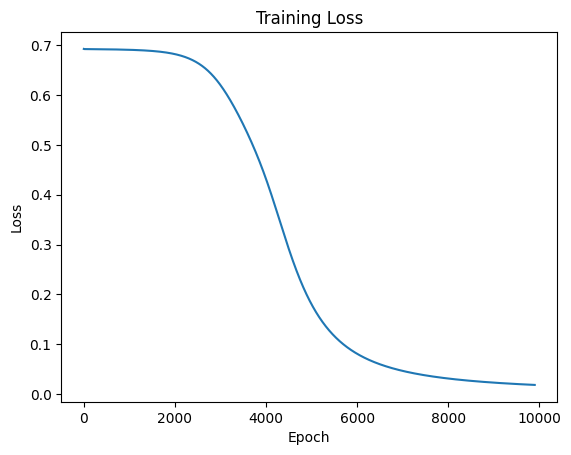

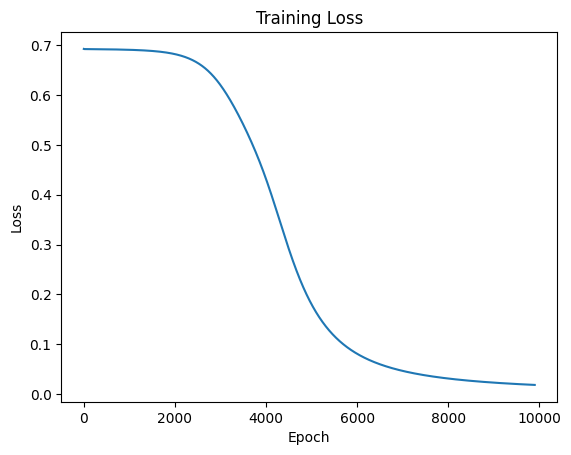

In [208]:
model.train() #set to train mode
epoch = 10000
losses = []
fig, ax = plt.subplots()
from IPython.display import display, clear_output

for epoch in range(epoch):

    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()
    losses.append(loss.item())
    if epoch % 1000 == 0:
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    if epoch % 100 == 0:
      clear_output(wait=True)
      ax.clear()
      ax.plot(losses)
      ax.set_xlabel('Epoch')
      ax.set_ylabel('Loss')
      ax.set_title('Training Loss')
      display(fig)


train ACC:  tensor(1.)
test ACC:  tensor(1.)


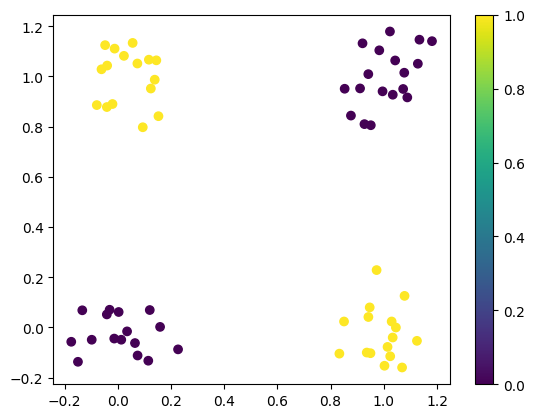

In [209]:
model.eval() #set model to eval mode

#train
y_pred = model(x_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc = y_train.shape[0]/torch.sum(y_pred == y_train.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("train ACC: ",train_acc.float())

#test
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = y_test.shape[0]/torch.sum(y_pred == y_test.int()) #check result: devide num of samples by num of correct ones, need to cast to int
print("test ACC: ",test_acc.float())

plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.colorbar()

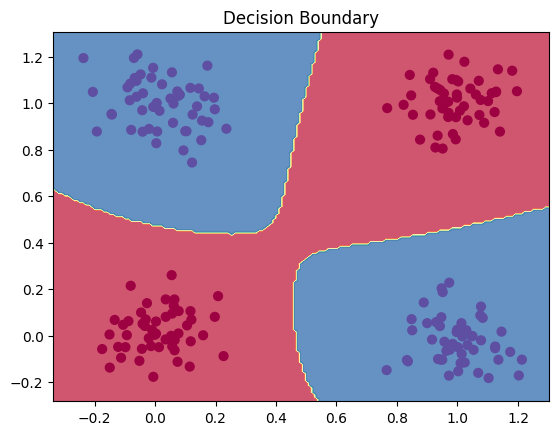

In [210]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = (Z > 0.5).float().reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z.detach().numpy(), cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")

plot_decision_boundary(model, X, y)
plt.show()